# Lepton mixing matrix on Minimal Seesaw (MSS) model.

In this notebook we will understand how the lepton mixing matrix of MSS is parametrized in the reference [Lepton flavor violating Higgs boson decays in seesaw models: New discussions](https://www.sciencedirect.com/science/article/pii/S0550321317301785), for future numerical application to the form factors of LFV Higgs decays. 

In [1]:
from OneLoopLFVHD.neutrinos import UpmnsStandardParametrization
from sympy import init_printing, symbols

In [2]:
init_printing()

First, we define the mixing matrix in the standard parametrization as follows

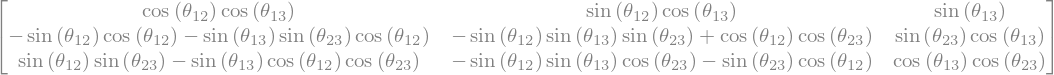

In [3]:
θ12,θ13,θ23 = symbols(r'\theta_{12},\theta_{13},\theta_{23}',real=True)
Upmns = UpmnsStandardParametrization(θ12,θ13,θ23)
Upmns

## Casas-Ibarra parametrization of $M_D$

The we follo using the CI parametrization to define $M_D$ as follows 
$$M_{D}^{T}=i U_{N}^{*}\left(M_{N}^{d}\right)^{1 / 2} \xi\left(\hat{m}_{v}\right)^{1 / 2} U_{\mathrm{PMNS}}^{\dagger}$$
where $M_N^d = \text{diag}(M_{N_1},M_{N_2},M_{N_3})$ and $m_\nu^d = \text{diag}(M_{n_1},M_{n_2},M_{n_3})$. In this particular analysis they choose $\xi = I_3$

Then we define these atrices as folows

In [4]:
from sympy import Matrix,sqrt,I

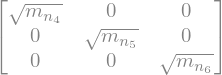

In [5]:
mn4,mn5,mn6 = symbols('m_{n_4},m_{n_5},m_{n_6}',positive=True)
MNdsqrt = Matrix([[sqrt(mn4),0,0],[0,sqrt(mn5),0],[0,0,sqrt(mn6)]])
MNdsqrt

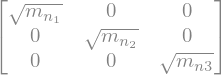

In [6]:
mn1,mn2,mn3 = symbols('m_{n_1},m_{n_2},m_{n3}',positive=True)
mndsqrt = Matrix([[sqrt(mn1),0,0],[0,sqrt(mn2),0],[0,0,sqrt(mn3)]])
mndsqrt

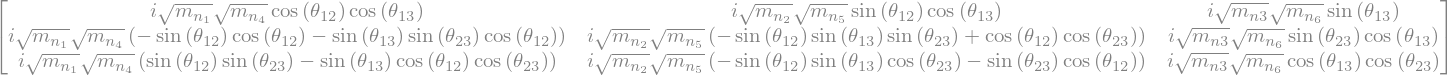

In [7]:
MD = I*Upmns*MNdsqrt*mndsqrt
MD

# Total mixing matrix $U^{\nu}$

The total mixing matrix in the case of three extra right handed neutrinos can be parametrized by 
$$U^\nu = \Omega
\begin{pmatrix}
U & \mathbf{O}\\
\mathbf{O} & V
\end{pmatrix}
$$
where in this case $\mathbf{O}$ represents a $3 \times 3$ null matrix, also $U$, $V$ are $3 \times 3$ unitary matrices. 

To other side, $\Omega$ is a $6 \times 6$ unitary matrix given by 
$$
\Omega=\exp\left(\begin{array}{cc}
\mathbf{O} & R \\
-R^{\dagger} & \mathbf{O}
\end{array}\right)=\left(\begin{array}{cc}
1-\frac{1}{2} R R^{\dagger} & R \\
-R^{\dagger} & 1-\frac{1}{2} R^{\dagger} R
\end{array}\right)+\mathcal{O}\left(R^{3}\right)
$$
where $R$ is a $3 \times 3$ matrixwith absolute values of all elements smaller tha unity. 

The condition of seesaw mechanism for neutrino mass generation is $|M_D| \ll |M_N|$,  where $|M_D|$ and $|M_N|$ denote characteristic scales of $M_D$ and $M_N$, resulting in useful ralations 
$$
\begin{array}{r}
R^{*} \simeq M_{D} M_{N}^{-1}, \quad m_{v} \simeq-M_{D} M_{N}^{-1} M_{D}^{T} \\
V^{*} \hat{M}_{N} V^{\dagger} \simeq M_{N}+\frac{1}{2} R^{T} R^{*} M_{N}+\frac{1}{2} M_{N} R^{\dagger} R
\end{array}
$$

In the particular case of $\xi = U_N = I_3$, we have
$$
M_{N}^{d}=M_{N}, \quad R=-i U_{\mathrm{PMNS}} \hat{m}_{v}^{1 / 2}\left(M_{N}^{d}\right)^{-1 / 2}, \quad V=I_{3}, \quad \hat{M}_{N}=M_{N}^{d}+\hat{m}_{\nu}
$$

In [8]:
from sympy import MatrixSymbol, BlockDiagMatrix,eye, BlockMatrix,S,block_collapse,I,lambdify
from sympy.physics.quantum.dagger import Dagger

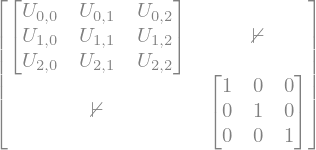

In [9]:
U = MatrixSymbol('U',3,3)
V = eye(3,3)
Q = BlockDiagMatrix(U,V)
Q

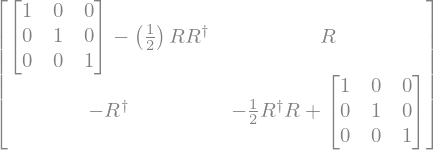

In [10]:
R = MatrixSymbol('R',3,3)
I3 = eye(3,3)
A = I3 - S(1)/2*R*Dagger(R)
D = I3 - S(1)/2*Dagger(R)*R
Ω = BlockMatrix([[A,R],[-Dagger(R),D]])
Ω

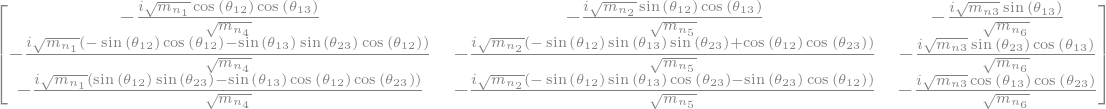

In [11]:
MNdsqrtinv = Matrix([[1/sqrt(mn4),0,0],[0,1/sqrt(mn5),0],[0,0,1/sqrt(mn6)]])
Rexp = -I*Upmns*mndsqrt*MNdsqrtinv 
Rexp

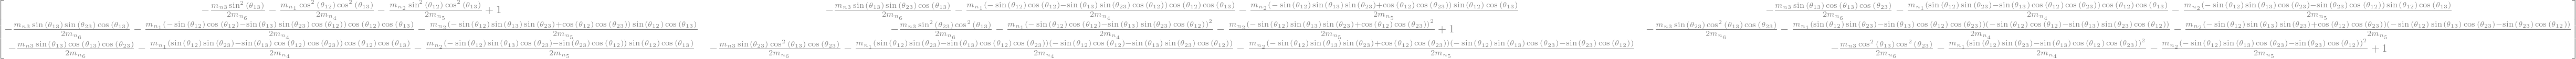

In [12]:
Aexp = I3 - S(1)/2*Rexp*Dagger(Rexp)
Dexp = I3 - S(1)/2*Dagger(Rexp)*Rexp
Aexp

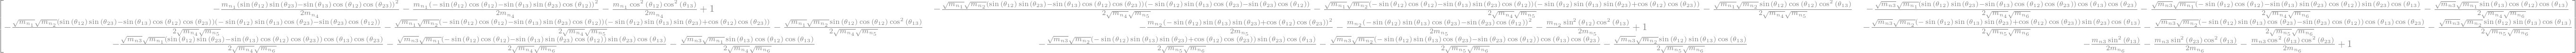

In [13]:
Dexp

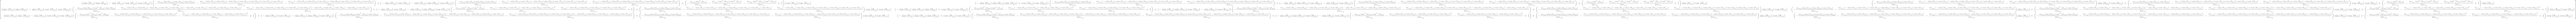

In [14]:
U11 = Aexp*Upmns
U12 = Rexp*V
U21 = -Dagger(Rexp)*Upmns
U22 = Dexp*V
U11

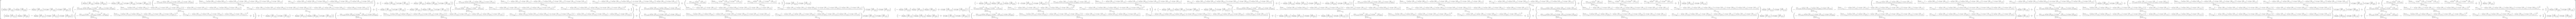

In [15]:
mheavy = {mn4:mn6/3,mn5:mn6/2}
U11.subs(mheavy)

In [16]:
def Unusp(i,j):
    if i<=3 and j<=3:
        U = U11[i-1,j-1]
    elif i<=3 and j>3:
        U = U12[i-1,j-4]
    elif i>3 and j<=3:
        U = U21[i-4,j-1]
    elif i>3 and j>3:
        U = U22[i-4,j-4]
    else:
        ValueError('The index i and j must be in range [1,6]')
    return U

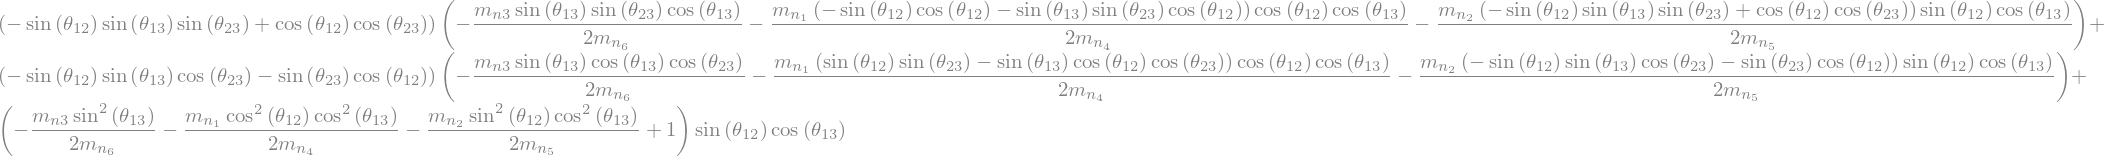

In [17]:
Unusp(1,2)

In [18]:
from sympy import Add, conjugate

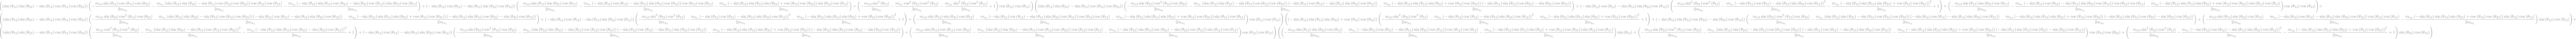

In [20]:
Cij = lambda i,j: Add(*[Unusp(c,i)*conjugate(Unusp(j,c)) for c in range(3)])
Cij(1,2)


In [41]:
#Unu[b-1,q-1],Unu_dagger[p-1,a-1],Cij(p-1,q-1),conj(Cij(p-1,q-1))
a = 2
b = 3
snN = 0
for k in range(1,7):
    for l in range(1,7):
        if not (k in [1,2,3] and l in [4,5,6]) or (l in [1,2,3] and k in [4,5,6]):
            Ckl = Cij(k,l)
            Cklc = conjugate(Ckl)
            UU = Unusp(b,k)*conjugate(Unusp(l,a))
            snN += UU*(Ckl + Cklc)

    

In [39]:
#snN

In [27]:
from OneLoopLFVHD.neutrinos import NuOscObservables
import numpy as np

In [28]:
Nudata = NuOscObservables
Nudata

OneLoopLFVHD.neutrinos.NuOscObservables

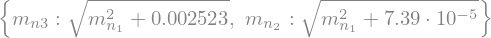

In [29]:
d21 = Nudata.squareDm21.central
d21
d31 = Nudata.squareDm31.central
d31
mlight ={mn2:sqrt(mn1**2 + d21),mn3:sqrt(mn1**2 + d31)}
mlight

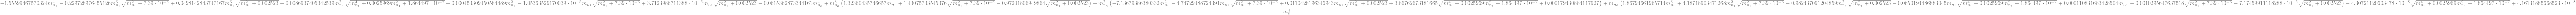

In [43]:
# snN.subs(Nudata().substitutions(
#     θ12,θ13,θ23)).subs({mn2:mn1,mn3:mn1,mn4:mn6,mn5:mn6}).expand().simplify()
snN.subs(Nudata().substitutions(
    θ12,θ13,θ23)).subs({mn2:sqrt(mn1**2 + d21),mn3:sqrt(mn1**2 + d31),
    mn4:mn6/3,mn5:mn6/2}).expand().simplify()

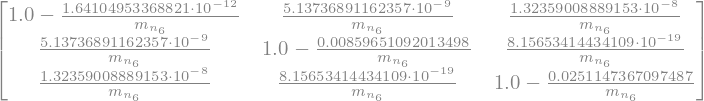

In [23]:
U22.subs(Nudata().substitutions(
    θ12,θ13,θ23)).subs(mheavy).subs(mlight).subs(mn1,1e-12).n()

In [19]:
U11num = lambdify([mn6],U11.subs(Nudata().substitutions(
    θ12,θ13,θ23)).subs(mheavy).subs(mlight).subs(mn1,1e-12).n(),'numpy')
U12num = lambdify([mn6],U12.subs(Nudata().substitutions(
    θ12,θ13,θ23)).subs(mheavy).subs(mlight).subs(mn1,1e-12).n(),'numpy')
U21num = lambdify([mn6],U21.subs(Nudata().substitutions(
    θ12,θ13,θ23)).subs(mheavy).subs(mlight).subs(mn1,1e-12).n(),'numpy')
U22num = lambdify([mn6],U22.subs(Nudata().substitutions(
    θ12,θ13,θ23)).subs(mheavy).subs(mlight).subs(mn1,1e-12).n(),'numpy')

def Unu(m6,i,j):
    if i<=3 and j<=3:
        U = U11num(m6)[i-1,j-1]
    elif i<=3 and j>3:
        U = U12num(m6)[i-1,j-4]
    elif i>3 and j<=3:
        U = U21num(m6)[i-4,j-1]
    elif i>3 and j>3:
        U = U22num(m6)[i-4,j-4]
    else:
        ValueError('The index i and j must be in range [1,6]')
    return U

In [22]:
i = 6
j = 6
#if i>3 and j<=3:
m6 = np.linspace(1,10,3)
X = U12num(m6)[i-4,j-4]#
X

array([-0.-0.16260494j, -0.-0.06933498j, -0.-0.0514202j ])

In [23]:
Unu(m6,0,1)

In [24]:
for i in range(len(m6)):
    display(U12num(m6[i])[0,0])

(-0-1.45400146892938e-06j)

(-0-6.199883095157074e-07j)

(-0-4.5979563630473866e-07j)

In [25]:
Unu(2,4,4)

In [26]:

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from Unu_seesaw import Unu #as Unu1

In [28]:
U21num(m6)[0,0]

array([-0.-1.83840966e-06j, -0.-7.83900513e-07j, -0.-5.81356180e-07j])

In [8]:
Unu(6,4,1)

(-0-7.505276008718404e-07j)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

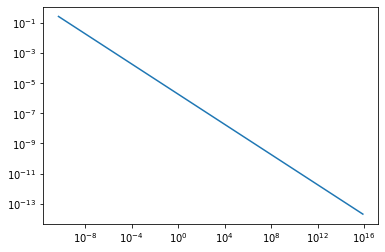

In [14]:
m6 = np.linspace(5e-11,8e15,10000)
plt.loglog(m6,np.abs(Unu(m6,4,1)))

In [15]:
def Cij(m6,i,j):
    suma = 0
    for c in range(1,4):
        suma += Unu(m6,c,i)*np.conjugate(Unu(m6,c,j))
    return suma

In [16]:
Cij(6,1,1)

1.061388888572152

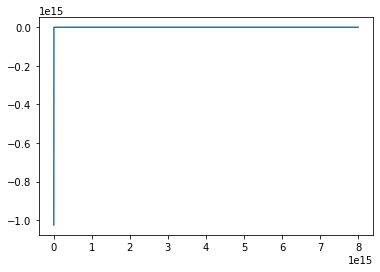

In [119]:
plt.plot(m6,Cij(m6,1,2))